# TP Titanic 2020

In [52]:
import pandas

On charge les données du Titanic :

In [53]:
url = "https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/titanic.csv"

In [54]:
titanic = pandas.read_csv(url)

Un petit aperçu des données :

In [55]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


On calcule l'âge moyen en considérant la colonne "Age" :

In [56]:
titanic.Age.mean()

29.69911764705882

L'âge moyen des passagers du Titanic est d'environ 29,7 ans.

On définit maintenant une variable contenant toutes les données dont la mention "cabine" est non vide :

In [57]:
passager_cabine = titanic[titanic.Cabin.notnull()]

Puis on compte le nombre de passagers masculins en filtrant la variable 'passager_cabine' puis en extrayant la donnée "PassengerId" avant d'en compter le nombre de valeurs (remarque : on aurait pu compter le nombre de valeurs de n'importe quelle autre colonne...)

In [58]:
passager_cabine[passager_cabine.Sex=='male'].PassengerId.count()

107

In [59]:
passager_cabine[passager_cabine.Sex=='female'].PassengerId.count()

97

Il y a 107 hommes et 97 femmes en cabine.

On note N le nombre total de passagers :

In [60]:
N=titanic.PassengerId.count()

Puis pour chaque classe, on compte le nombre de survivants :

In [64]:
classe1 = titanic[titanic.Pclass==1]
N=classe1.PassengerId.count()

In [65]:
classe1[classe1.Survived==1].PassengerId.count()/N

0.6296296296296297

In [66]:
classe2 = titanic[titanic.Pclass==2]
N=classe2.PassengerId.count()

In [67]:
classe2[classe2.Survived==1].PassengerId.count()/N

0.47282608695652173

In [68]:
classe3 = titanic[titanic.Pclass==3]
N=classe3.PassengerId.count()

In [69]:
classe3[classe3.Survived==1].PassengerId.count()/N

0.24236252545824846

On peut aller un peu plus vite en automatisant cette procédure dans une boucle, en itérant sur les classes :

In [49]:
classe = []
for k in range(3):
    liste = titanic[titanic.Pclass==k+1]
    classe.append(liste[liste.Survived==1].PassengerId.count()/N)

classe = pandas.Series(classe)

In [51]:
classe

0    0.152637
1    0.097643
2    0.133558
dtype: float64

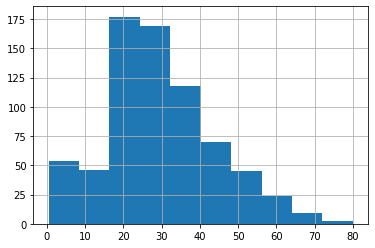

In [45]:
hist = titanic.Age.hist()